# Init

In [1]:
from fastai.vision.all import *
from fastai.vision.widgets import *
import timm

# Get data

In [2]:
path = untar_data(URLs.MNIST)

# Create a model

In [3]:
# Create the data loaders
data_block = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=GrandparentSplitter(train_name="training", valid_name="testing"),
    get_y=parent_label,
    item_tfms=Resize(224, method="Squish"),
    batch_tfms=aug_transforms(),
)
dls = data_block.dataloaders(path, bs=256)

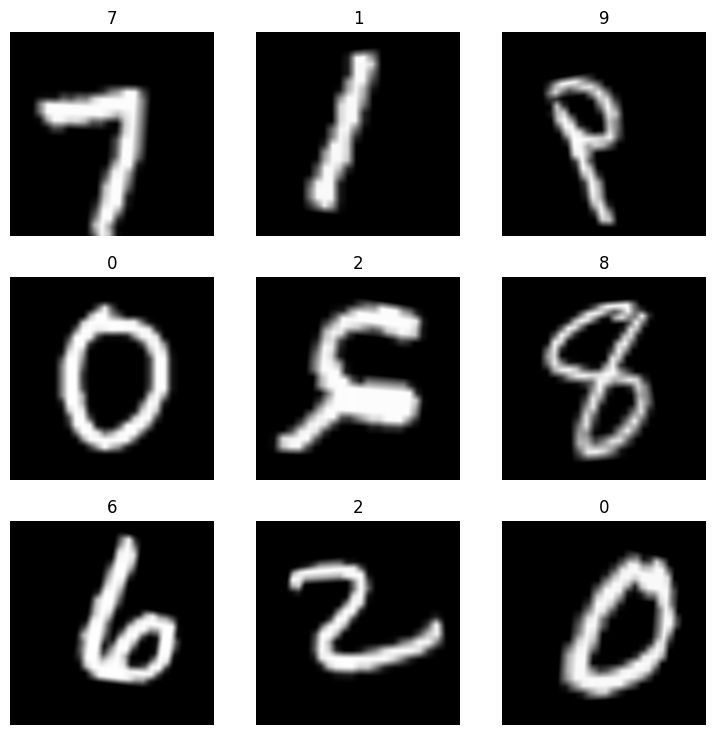

In [4]:
dls.show_batch()

In [5]:
# Run the learning
reslearn = vision_learner(dls, resnet18, metrics=error_rate)
reslearn.fine_tune(50)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,0.415728,0.174922,0.057800,02:38


epoch,train_loss,valid_loss,error_rate,time
0,0.120371,0.059950,0.019600,03:18
1,0.077413,0.043151,0.014400,03:30
2,0.061179,0.040221,0.013100,03:30
3,0.051251,0.034393,0.012100,03:29
4,0.042560,0.036070,0.012400,03:28
5,0.036849,0.036941,0.012300,03:27
6,0.038450,0.032962,0.009900,03:25
7,0.033731,0.030821,0.009500,03:24
8,0.035654,0.035142,0.011300,03:24
9,0.031340,0.032995,0.009900,03:23


# Results

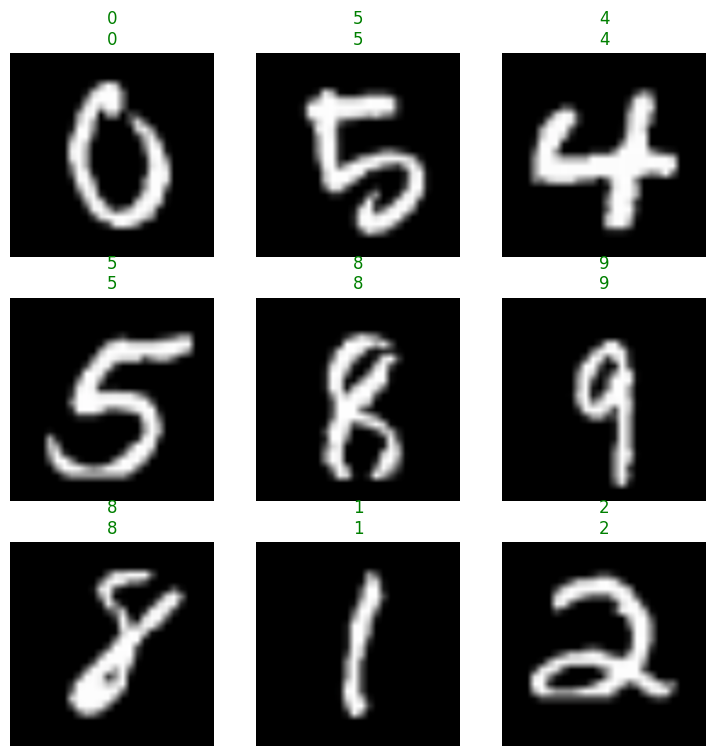

In [7]:
reslearn.show_results()

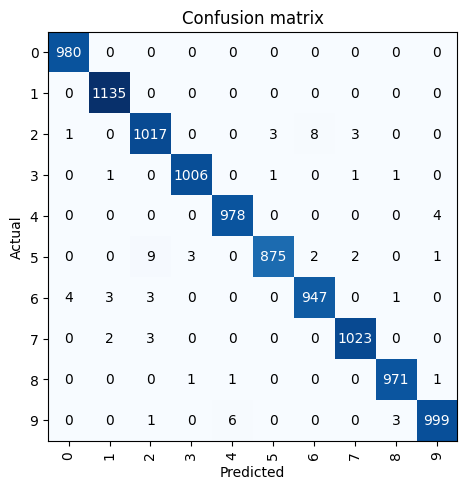

In [8]:
interp = ClassificationInterpretation.from_learner(reslearn)
interp.plot_confusion_matrix()

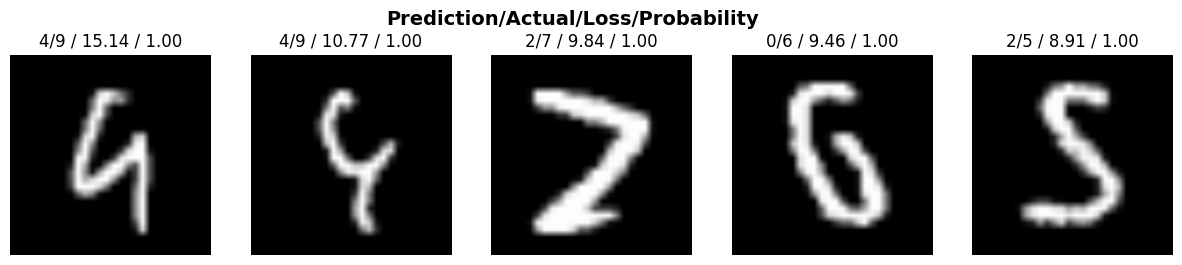

In [9]:
interp.plot_top_losses(5, nrows=1)

# Save the model

In [10]:
reslearn.export("models/handwriting.pkl")

# Make a GUI

In [25]:
import gradio as gr
from fastai.vision.all import *

learner = load_learner("models/handwriting.pkl")
categories = learner.dls.vocab


def classify_num(img):
    try:
        pred, pred_idx, probs = learner.predict(img)
        res = dict(zip(categories, map(float, probs)))
        return res
    except:
        return "Error"


gr.Interface(
    fn=classify_num,
    inputs="sketchpad",
    outputs="label",
    theme=gr.themes.Monochrome(),
    title="Single digit number",
    description="Draw a single digit number.",
).launch()

Running on local URL:  http://127.0.0.1:7867

To create a public link, set `share=True` in `launch()`.
